In [3]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

In [4]:
df = pd.read_csv("../../results/csv/merged/stats.csv")
df

,k,n,arity,quantity_of_operations,count,percent
0,2,1,1,1,2,0.125000
1,2,1,2,1,110,0.429688
2,2,1,3,1,52670,0.803680
3,2,2,1,1,0,0.000000
4,2,2,2,1,24,0.000366
5,2,2,3,1,40824,0.000010
6,2,3,1,1,0,0.000000
7,2,3,2,1,24,0.000001
8,3,2,1,1,0,0.000000
9,2,1,2,2,26280,0.805147


In [5]:
def plot_cardinality_distribution(csv_file):
    cardinalities = []

    with open(csv_file, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f, delimiter=";")
        for row in reader:
            cardinalities.append(int(row["cardinality"]))

    count = Counter(cardinalities)

    sorted_keys = sorted(count.keys())
    values = [count[k] for k in sorted_keys]

    plt.figure(figsize=(4, 3))
    plt.bar(sorted_keys, values, color='skyblue')
    plt.xlabel("Cardinality")
    plt.ylabel("Frequency")
    plt.title("Распределение мощности минимального генерирующего множества")
    plt.xticks(sorted_keys)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

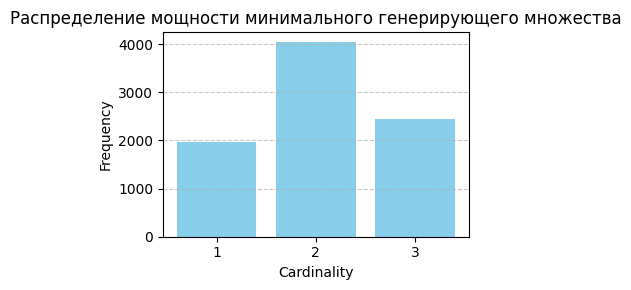

In [6]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_sets2_k3_n1_arity1.csv")

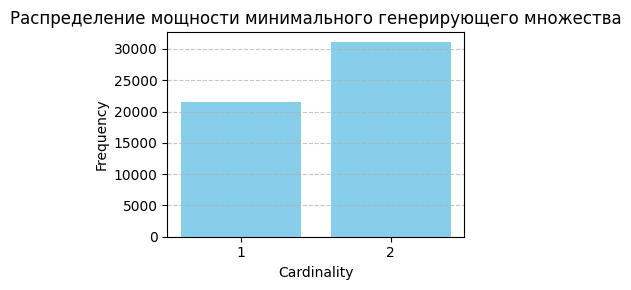

In [7]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_k2_n1_arity3.csv")

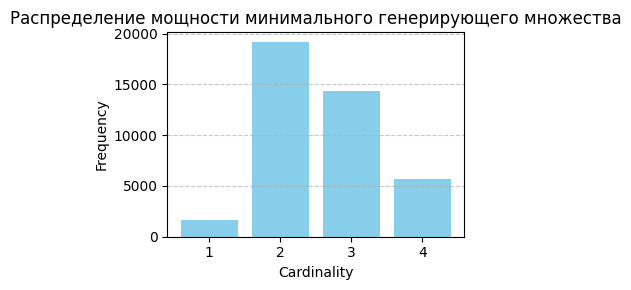

In [8]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_k2_n2_arity3.csv")

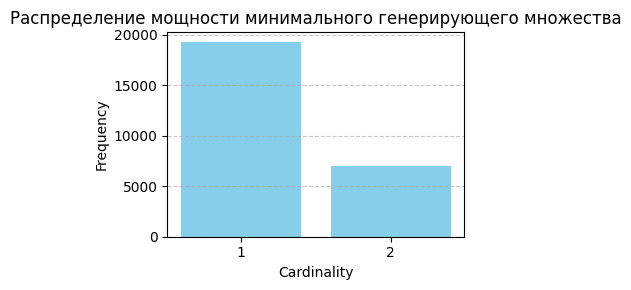

In [9]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_sets2_k2_n1_arity2.csv")

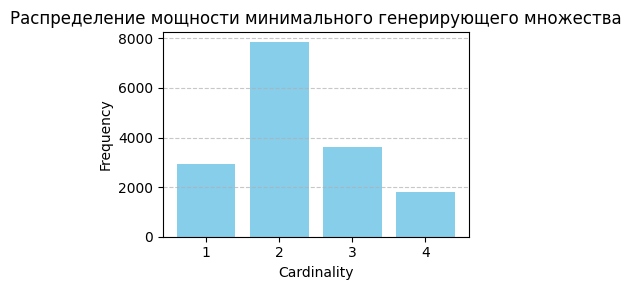

In [10]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_sets2_k2_n2_arity2.csv")

In [11]:
import re
import seaborn as sns
import pandas as pd

In [12]:
def visualize_pair_frequencies_k2n2(file_path: str):
    pair_counter = Counter()

    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            g_set = row['g_set']
            pairs = re.findall(r'\d \d', g_set)
            pair_counter.update(pairs)

    matrix = pd.DataFrame(0, index=['0', '1'], columns=['0', '1'])
    for pair, count in pair_counter.items():
        i, j = pair.split()
        matrix.loc[i, j] = count

    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Частота пар в генерирующих множествах')
    plt.xlabel('Второй элемент пары')
    plt.ylabel('Первый элемент пары')
    plt.show()

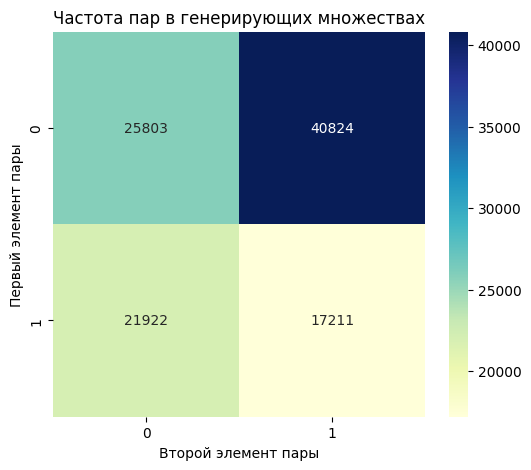

In [13]:
visualize_pair_frequencies_k2n2("../../results/csv/growth_rates_of_k2_n2_arity3.csv")

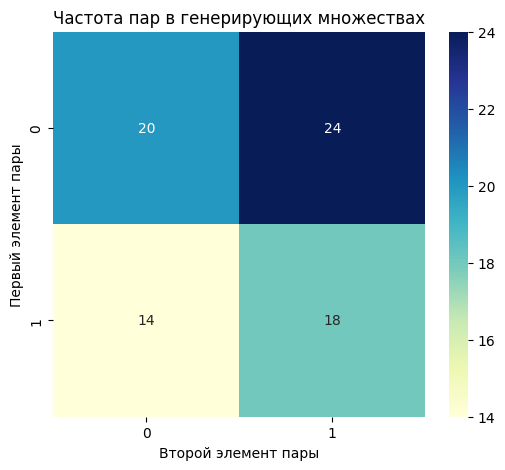

In [14]:
visualize_pair_frequencies_k2n2("../../results/csv/growth_rates_of_k2_n2_arity2.csv")

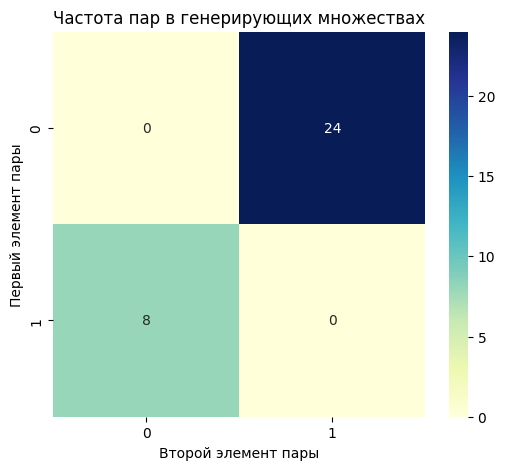

In [15]:
visualize_pair_frequencies_k2n2("../../results/csv/growth_rates_of_sets3_k2_n2_arity1.csv")

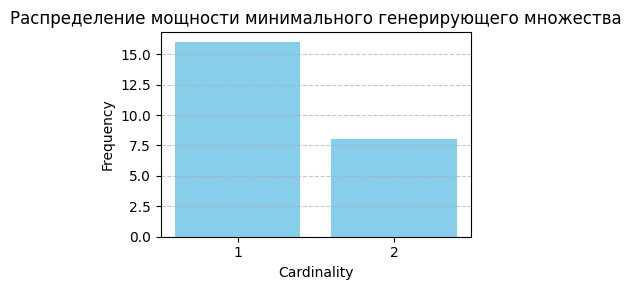

In [16]:
plot_cardinality_distribution("../../results/csv/growth_rates_of_sets3_k2_n2_arity1.csv")